Рубежный контроль 1
Студент: Нобатов Ишан ИУ5-24М
Вариант 10 (Задача 10 + Задача 30)

Задача №10.
Для набора данных проведите устранение пропусков для одного (произвольного) категориального 
признака с использованием метода заполнения наиболее распространенным значением.

In [38]:
# Библиотеки
# !pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 264.4 kB/s eta 0:00:000:00:010:00:01:01


In [22]:
# Загружаем датасет
data = pd.read_csv('датасеты/311_Service_Requests_from_2010_to_Present.csv')
data.head()

/tmp/ipykernel_64369/3119205725.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('датасеты/311_Service_Requests_from_2010_to_Present.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [23]:
# подсчет количества пропущенных значений по столбцам
missing_values_count = data.isnull().sum()
missing_values_count

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [24]:
# Выбираем категориальный признак address type
categorical_feature = 'Address Type'
# определение наиболее распространенного значения для выбранного признака
most_common_value = data[categorical_feature].mode()[0]
most_common_value

'ADDRESS'

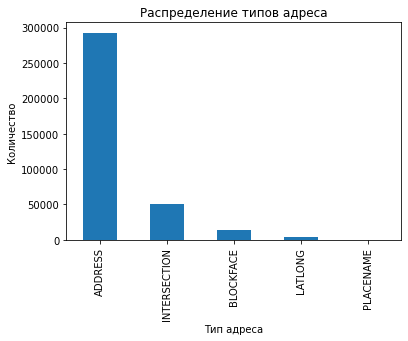

In [26]:
# Построение бар-чарта
data[categorical_feature].value_counts().plot(kind='bar')

# Добавление названий осей
plt.xlabel('Тип адреса')
plt.ylabel('Количество')

# Добавление заголовка
plt.title('Распределение типов адреса')

# Отображение графика
plt.show()

Как видно наиболее распространенным типом адреса является ADDRESS

In [27]:
# заполняем пустые значения
data[categorical_feature].fillna(most_common_value, inplace=True) 

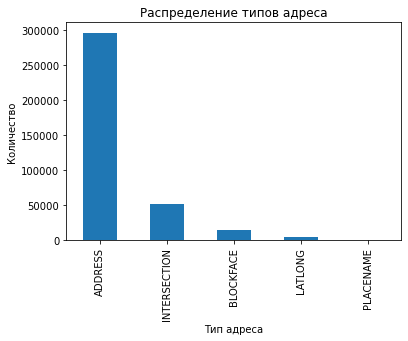

In [28]:
# строим диаграмму после заполнения

data[categorical_feature].value_counts().plot(kind='bar')

plt.xlabel('Тип адреса')
plt.ylabel('Количество')

plt.title('Распределение типов адреса')

plt.show()

Задача №30.
Для набора данных проведите удаление повторяющихся признаков.

In [30]:
# получим количество уникальных значений для каждого столбца
unique_counts = data.nunique()
unique_counts

Unique Key                        364558
Created Date                      362018
Closed Date                       339837
Agency                                 1
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Zip                         201
Incident Address                  126372
Street Name                         7693
Cross Street 1                      6234
Cross Street 2                      6064
Intersection Street 1               4704
Intersection Street 2               4422
Address Type                           5
City                                  53
Landmark                             120
Facility Type                          1
Status                                 4
Due Date                          362015
Resolution Description                18
Resolution Action Updated Date    340833
Community Board                       75
Borough         

In [36]:
# список столбцов с повторяющимися значениями
repeated_columns = unique_counts[unique_counts == 1].index.tolist()
# список пустых колонок
empty_columns = unique_counts[unique_counts == 0].index.tolist()
# удалить выбранные столбцы
data = data.drop(repeated_columns, axis=1)
data = data.drop(empty_columns, axis=1)
# результаты
unique_counts = data.nunique()
unique_counts

Unique Key                        364558
Created Date                      362018
Closed Date                       339837
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Zip                         201
Incident Address                  126372
Street Name                         7693
Cross Street 1                      6234
Cross Street 2                      6064
Intersection Street 1               4704
Intersection Street 2               4422
Address Type                           5
City                                  53
Landmark                             120
Status                                 4
Due Date                          362015
Resolution Description                18
Resolution Action Updated Date    340833
Community Board                       75
Borough                                6
X Coordinate (State Plane)         68410
Y Coordinate (St

Дополнительные требования по группам:

Для студентов группы ИУ5-24М - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

<AxesSubplot:xlabel='Month'>

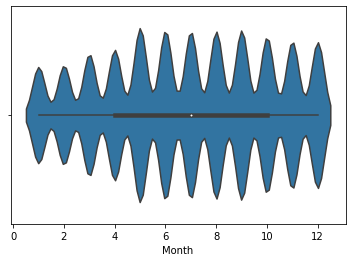

In [43]:
# строим скрипичнуб диаграмму
data['Created Date'] = pd.to_datetime(data['Created Date'])

# Извлечение месяца из даты
data['Month'] = data['Created Date'].dt.month

# Создание скрипичной диаграммы
sns.violinplot(x='Month', data=data)